# Phase 3 Project Submission
* Student name: Simran Kaur
* Student pace: Part Time
* Scheduled project review date/time: Friday, January 6th. 
* Instructor name: Morgan Jones
* Blog post URL: TBD

# SyriaTel Customer Churn Analysis

## Overview

SyriaTel is a telecommunications company in Syria. This analysis will determine what features will indicate if a customer will ("soon") discontinue their service.

## Obtaining Data

In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats
from sklearn.model_selection import GridSearchCV

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data from csv file & create dataframe. Preview first 5 rows.
df = pd.read_csv("dataset.csv")
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
# Check shape of dataframe
df.shape

(3333, 21)

### Summary of Features in the Datset
* state: the state the customer lives in
* account length: the number of days the customer has had an account
* area code: the area code of the customer
* phone number: the phone number of the customer
* international plan: true if the customer has the international plan, otherwise false
* voice mail plan: true if the customer has the voice mail plan, otherwise false
* number vmail messages: the number of voicemails the customer has sent
* total day minutes: total number of minutes the customer has been in calls during the day
* total day calls: total number of calls the user has done during the day
* total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
* total eve minutes: total number of minutes the customer has been in calls during the evening
* total eve calls: total number of calls the customer has done during the evening
* total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
* total night minutes: total number of minutes the customer has been in calls during the night
* total night calls: total number of calls the customer has done during the night
* total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
* total intl minutes: total number of minutes the user has been in international calls
* total intl calls: total number of international calls the customer has done
* total intl charge: total amount of money the customer was charged by the Telecom company for international calls
* customer service calls: number of calls the customer has made to customer service
* churn: true if the customer terminated their contract, otherwise false

## Explanatory Data Analysis (EDA) 

In [4]:
# Check for duplicated rows
df.duplicated().sum()

0

In [5]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Remove customer number feature it is contact information on the client and adds no value to the analysis
# Recheck dataframe
df.drop(['phone number'],axis=1,inplace=True)
df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [7]:
# Check the number of unique values in all columns to determine feature type
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

### Conclusion

Continuous Features (numeric value with an infinite number of possible values):
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

Categorical Features (finite number of categories/groups):
* state
* area code
* international plan
* voicemail plan

In [8]:
# Create numeric & categotical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

### Analysis on 'churn' Feature
* Churn will be used as the dependent variable in this analysis.
* Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account. 

False    2850
True      483
Name: churn, dtype: int64


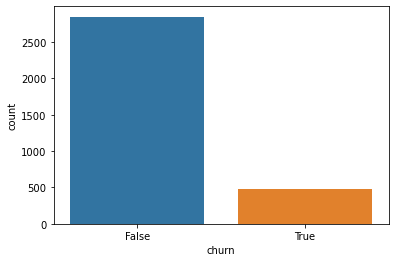

In [9]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

* Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost. 
* The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

### Analysis on "area code" 

In [10]:
# Pie chart of area code feature
area = df['area code'].value_counts()
transuction = area.index
quantity = area.values

# draw pie circule with plotly
figure = px.pie(df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

* Half of the customers have the area code 415. 
* One fourth of customers have the area code 510 and another fourth have the area code 408.

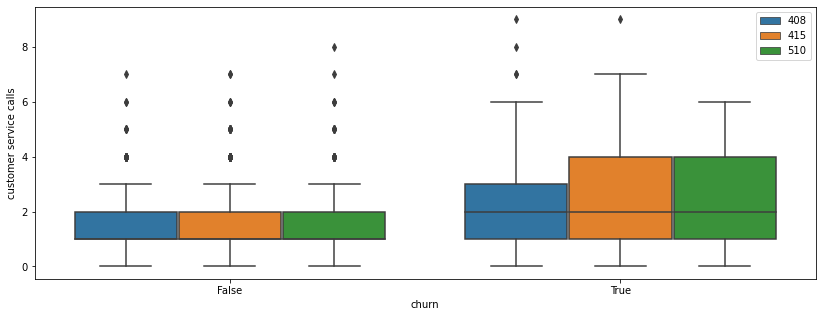

In [11]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

* There are outliers, in all area codes, amongst the customers who have not terminated their accounts. 
* Of the customers who have terminated their account, they more likely have a 415 or a 510 area code. 

### Distrubution Plots for Numeric Features

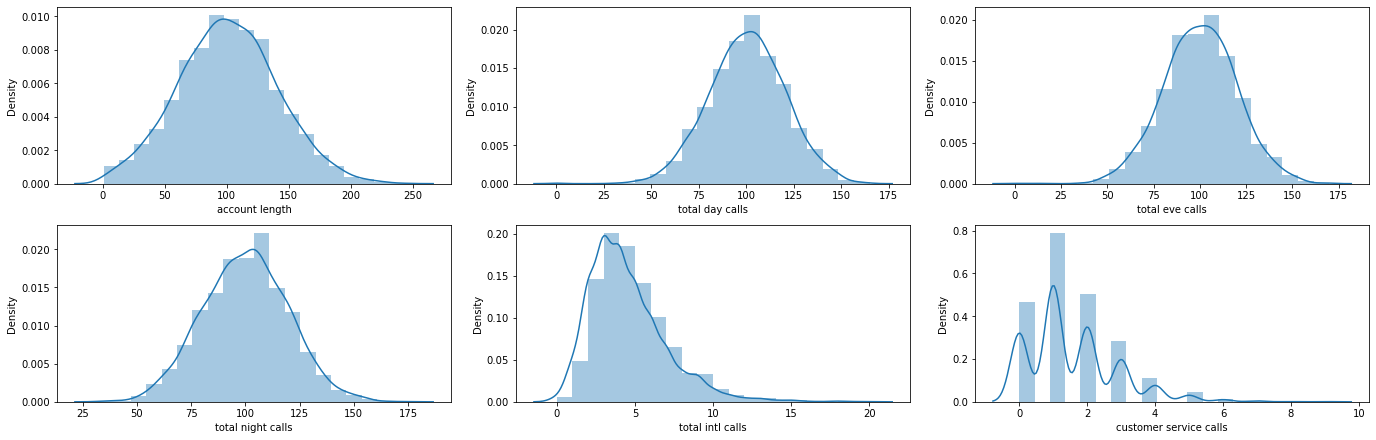

In [12]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

* For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed. 
* Customer service calls has a few peaks, which indicates there are a few modes in the population. This makes sense because customer service calls has to be a integer and not a float number. 

### Pair Plots for Numeric Features (Hue as "Churn")

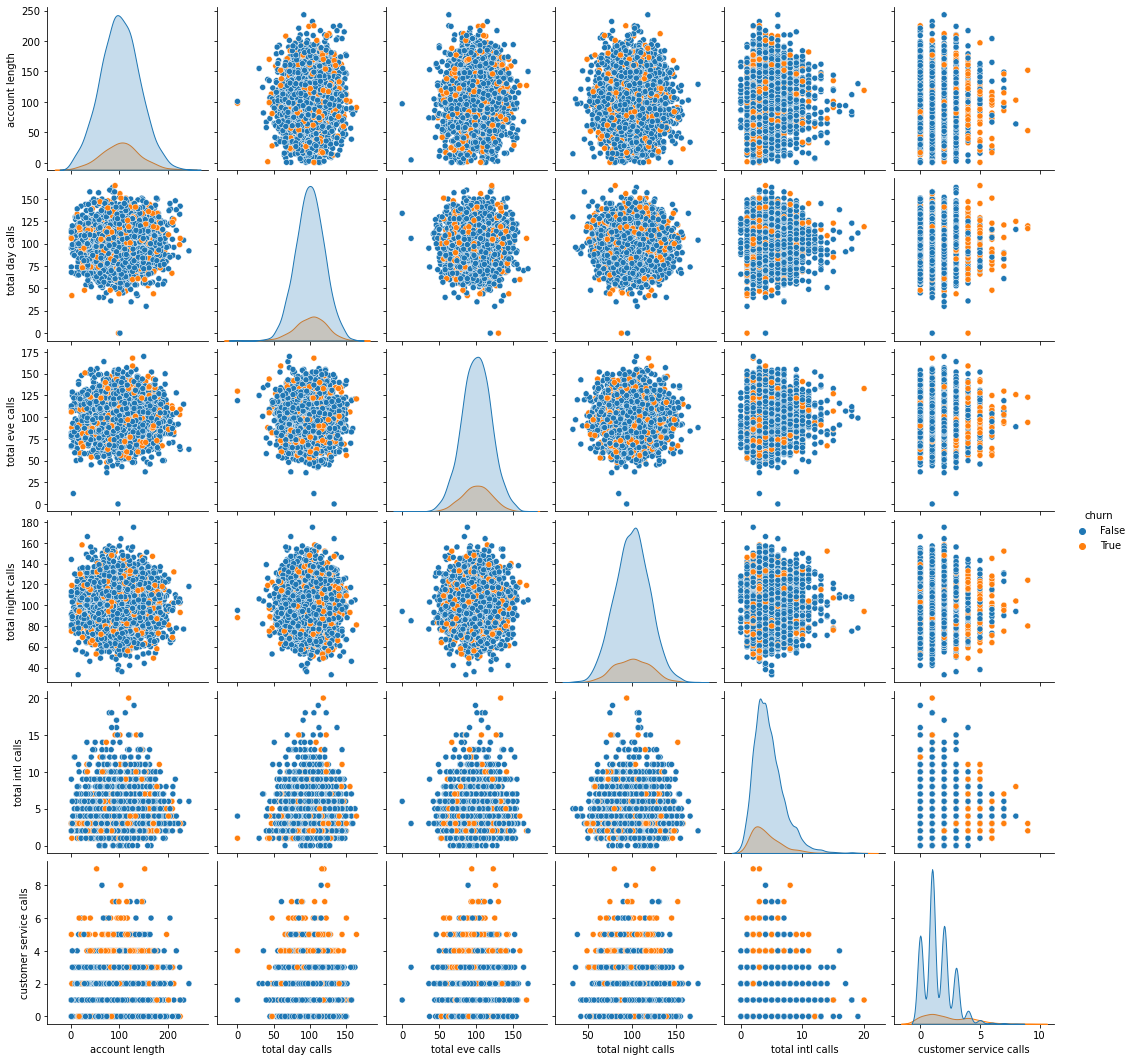

In [13]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

* There seems to be a evident relationship between customer service calls and true churn values. After 4 calls, customers are a lot more likely to discontinue their service.

### Correlation Heatmap for Numeric Features

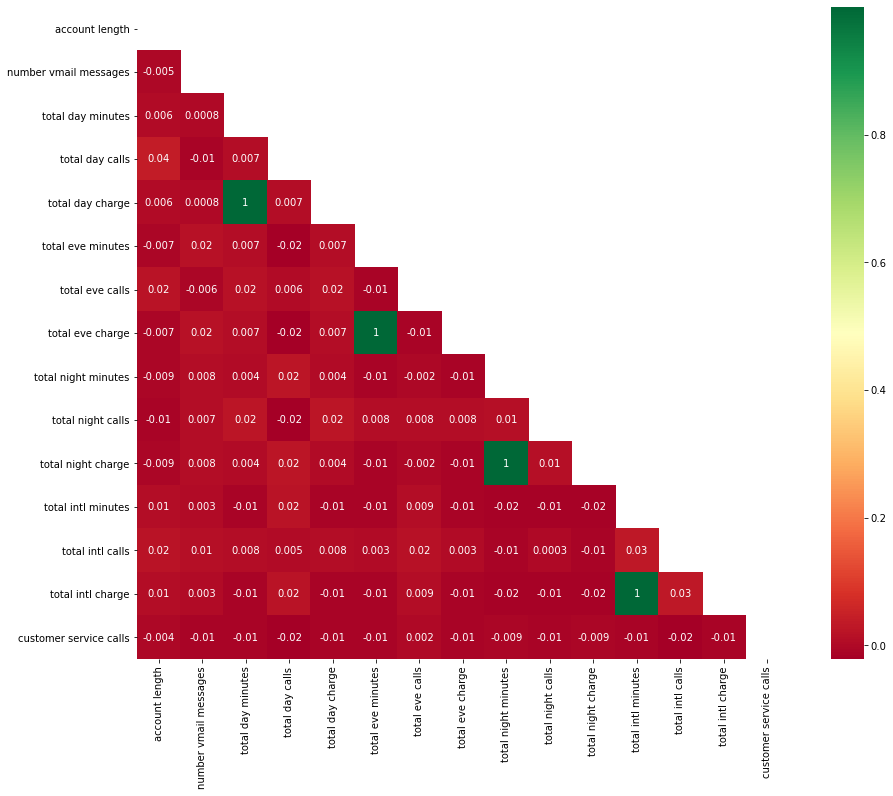

In [14]:
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, square=True,cmap='RdYlGn',fmt='.0g',mask = mask);
plt.xticks(rotation=90);
plt.yticks(rotation=0);

* Most of the features are not correlated however some do share a perfect correlation. 
    * Total day charge and total day minutes features are fully positively correlated. 
    * Total eve charge and total eve minutes features are fully positively correlated.
    * Total night charge and total night minutes features are fully positively correlated. 
    * Total int charge and total int minutes features are fully positively correlated. 
* It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.   
* The perfect correlation of 1 indicates the presence of perfect multicollinearity. It does not have the same impact on nonlinear models as it does on linear models. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

### Categorical Features Analysis

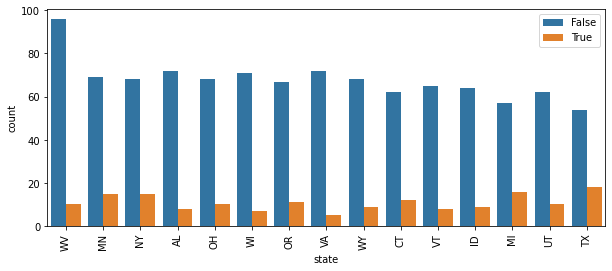

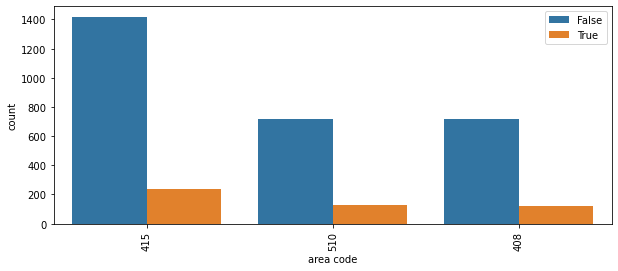

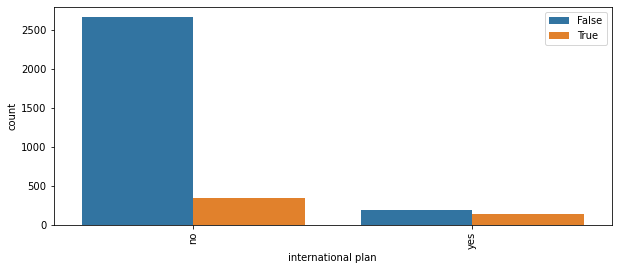

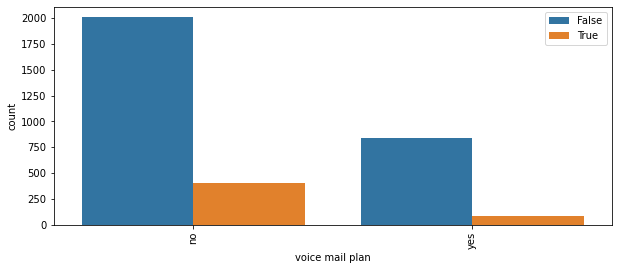

In [15]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

### Outlier Detection & Treatment
* Dropping outliers past 3 standard deviations. 

In [16]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3169


### Dropping Highly-Correlated Features
* Dropping features that have a correlation of 0.9 or above. 

In [17]:
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 20 columns.
The reduced dataframe has 16 columns.


### Transforming "Churn" Feature's Rows into 0s and 1s

In [18]:
reduced_df['churn'].value_counts()

False    2727
True      442
Name: churn, dtype: int64

In [19]:
reduced_df['churn'] = reduced_df['churn'].map({True: 1, False: 0}).astype('int') 
reduced_df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day calls  total day charge  total eve calls  \
0                     25              110             45.07               99   
1                     26              123             27.47              103   
2                      0              114             41.38              110   
3                      0               71             50.90               88   
4                      0              113             28.34              122   

   total eve charge  total night calls  total night charge  total intl calls  \
0             16.78                 91               11.01                 3   
1             16.62                103               11.45                 3   
2             10.30                104                7.32                 5   
3              5.26                 89                8.86                 7   
4             12.61                121                8.41                 3   

   total intl charge  customer service calls  churn  
0               2.70                       1      0  
1               3.70                       1      0  
2               3.29                       0      0  
3               1.78                       2      0  
4               2.73                       3      0

### One-Hot Encoding
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [20]:
dummy_df_state = pd.get_dummies(reduced_df["state"],dtype=np.int64,prefix="state_is")
dummy_df_area_code = pd.get_dummies(reduced_df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(reduced_df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(reduced_df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


reduced_df = pd.concat([reduced_df,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
reduced_df = reduced_df.loc[:,~reduced_df.columns.duplicated()]
reduced_df = reduced_df.drop(['state','area code','international plan','voice mail plan'],axis=1)

reduced_df.head()

account length  number vmail messages  total day calls  total day charge  \
0             128                     25              110             45.07   
1             107                     26              123             27.47   
2             137                      0              114             41.38   
3              84                      0               71             50.90   
4              75                      0              113             28.34   

   total eve calls  total eve charge  total night calls  total night charge  \
0               99             16.78                 91               11.01   
1              103             16.62                103               11.45   
2              110             10.30                104                7.32   
3               88              5.26                 89                8.86   
4              122             12.61                121                8.41   

   total intl calls  total intl charge  ...  state_is_VT  state_is_WA  \
0                 3               2.70  ...            0            0   
1                 3               3.70  ...            0            0   
2                 5               3.29  ...            0            0   
3                 7               1.78  ...            0            0   
4                 3               2.73  ...            0            0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0            0            0            0                 0                 1   
1            0            0            0                 0                 1   
2            0            0            0                 0                 1   
3            0            0            0                 1                 0   
4            0            0            0                 0                 1   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0                 0                          0                       1  
1                 0                          0                       1  
2                 0                          0                       0  
3                 0                          1                       0  
4                 0                          1                       0  

[5 rows x 68 columns]

### Scaling Numerical Features
* Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
* In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation problem that we found above will be solved.
* MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [21]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(reduced_df[columns].values.reshape(-1,1))

for i in reduced_df.select_dtypes(include=[np.number]).columns:
    reduced_df[i] = scaling(i)
reduced_df.head()

account length  number vmail messages  total day calls  total day charge  \
0        0.587963               0.510204         0.576271          0.773956   
1        0.490741               0.530612         0.686441          0.450248   
2        0.629630               0.000000         0.610169          0.706088   
3        0.384259               0.000000         0.245763          0.881184   
4        0.342593               0.000000         0.601695          0.466250   

   total eve calls  total eve charge  total night calls  total night charge  \
0         0.487179          0.490082           0.422414            0.643644   
1         0.521368          0.483858           0.525862            0.675974   
2         0.581197          0.238040           0.534483            0.372520   
3         0.393162          0.042007           0.405172            0.485672   
4         0.683761          0.327888           0.681034            0.452608   

   total intl calls  total intl charge  ...  state_is_VT  state_is_WA  \
0               0.2           0.487585  ...          0.0          0.0   
1               0.2           0.713318  ...          0.0          0.0   
2               0.4           0.620767  ...          0.0          0.0   
3               0.6           0.279910  ...          0.0          0.0   
4               0.2           0.494357  ...          0.0          0.0   

   state_is_WI  state_is_WV  state_is_WY  area_code_is_408  area_code_is_415  \
0          0.0          0.0          0.0               0.0               1.0   
1          0.0          0.0          0.0               0.0               1.0   
2          0.0          0.0          0.0               0.0               1.0   
3          0.0          0.0          0.0               1.0               0.0   
4          0.0          0.0          0.0               0.0               1.0   

   area_code_is_510  international_plan_is_yes  voice_mail_plan_is_yes  
0               0.0                        0.0                     1.0  
1               0.0                        0.0                     1.0  
2               0.0                        0.0                     0.0  
3               0.0                        1.0                     0.0  
4               0.0                        1.0                     0.0  

[5 rows x 68 columns]

### Train-Test Split
* Splitting the dataset into training and testing as 75% training and 25% testing

In [22]:
X=reduced_df.drop(['churn'],axis=1)
y=reduced_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

### Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature
* SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.
* The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [23]:
reduced_df.churn.value_counts()

0.0    2727
1.0     442
Name: churn, dtype: int64

In [24]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2376, 67)
Before OverSampling, the shape of y_train: (2376,)
After OverSampling, the shape of X_train_over: (4126, 67)
After OverSampling, the shape of y_train_over: (4126,)


In [25]:
y_train_over.value_counts()

1.0    2063
0.0    2063
Name: churn, dtype: int64

In [26]:
churn = reduced_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()

In [27]:
y_train_over_df = y_train_over.to_frame()
churn = y_train_over_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over_df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - After SMOTE')
figure.show()

## Modeling

### Model 1 - Logistic Regression Classifier
* Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. 
* It is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1. 
* This method will be used to create a baseline model.

In [28]:
# Object creation, fitting the data & getting predictions 
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred_lr = lr.predict(X_test) 

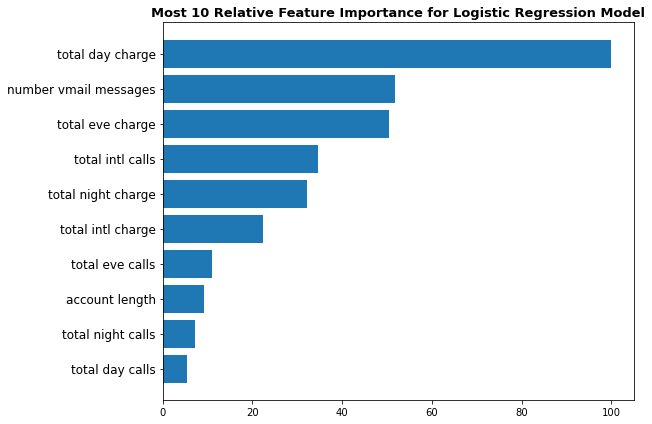

In [29]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
plt.title('Most 10 Relative Feature Importance for Logistic Regression Model', fontsize=13, fontweight='bold')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)

plt.tight_layout()
plt.show()

In [30]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       664
           1       0.38      0.73      0.50       129

    accuracy                           0.77       793
   macro avg       0.66      0.75      0.67       793
weighted avg       0.85      0.77      0.79       793



**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.76545
F1 score for testing set:  0.50267
Recall score for testing set:  0.72868
Precision score for testing set:  0.38367


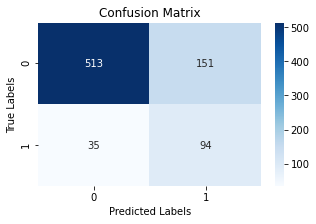

In [31]:
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the logistic regression classifier model, total day charge, number of voicemail messages and total evening charge are the top three important features.
* Model accuracy is 76.5%, which isn't bad. F1 score is only 50.2% which means the test will only be accurate half the times it is ran. 

### Model 2 - Random Forest Classifier
* Random forest is an ensemble machine learning algorithm.
*  A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.
* In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

In [32]:
# Object creation, fitting the data & getting predictions 
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train_over,y_train_over) 
y_pred_rf = rf_model_final.predict(X_test)

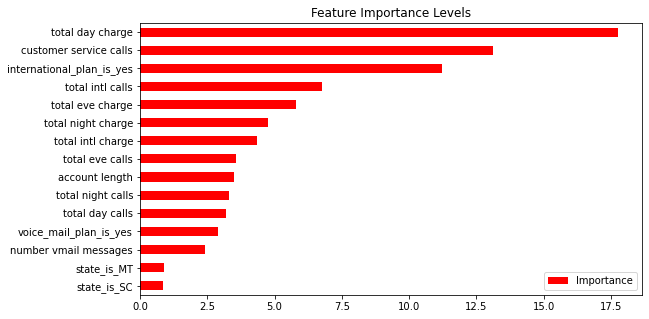

In [33]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

In [34]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       664
           1       0.75      0.71      0.73       129

    accuracy                           0.91       793
   macro avg       0.84      0.83      0.84       793
weighted avg       0.91      0.91      0.91       793



**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.91299
F1 score for testing set:  0.7251
Recall score for testing set:  0.70543
Precision score for testing set:  0.7459


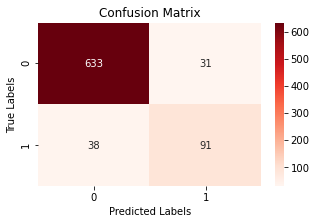

In [35]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the random forest classifier, total day charge, customer service calles and "international plan is yes" features have the highest impact on the model. 
* Accuracy and F1 score are much higher for this model, which is good news.

### Model 3 - Decision Tree Classifier
* Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
* It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
* Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
* The logic behind the decision tree can be easily understood because it shows a tree-like structure.

In [36]:
# Object creation, fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over,y_train_over)
y_pred_dt = decision_tree.predict(X_test)

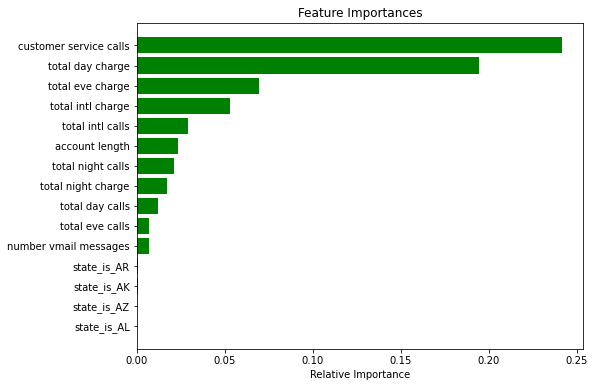

In [37]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       664
           1       0.62      0.74      0.68       129

    accuracy                           0.89       793
   macro avg       0.79      0.83      0.80       793
weighted avg       0.89      0.89      0.89       793



**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** 
Accuracy score for testing set:  0.88525
F1 score for testing set:  0.67616
Recall score for testing set:  0.73643
Precision score for testing set:  0.625


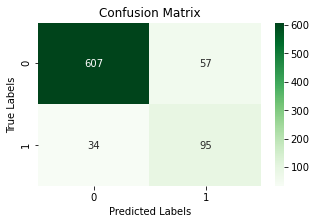

In [39]:
print("**************** DECISION TREE CLASSIFIER MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* According to the decision tree classifier, customer service calls total day charge and total evening charge are the three most important for the model.
* The accuracy and F1 score for this model is not as great as model 2.

## Models Comparison

### ROC Curve

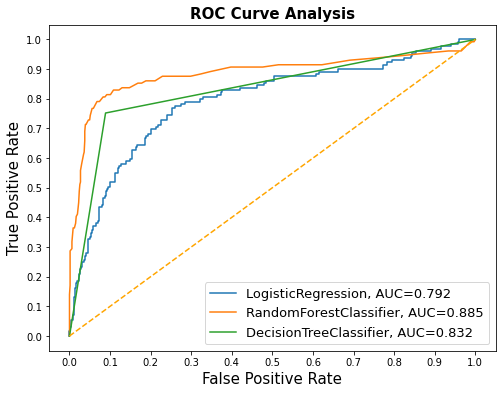

In [40]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

* The ROC curve illustrates the true positive rate against the false positive rate of our classifier.
* The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case. 

### Model Comparisons - F1 Score 

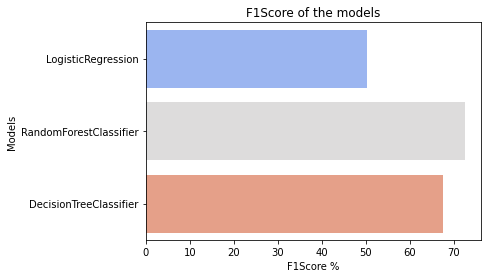

In [41]:
models = [lr,rf_model_final,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","F1Score"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    precision = f1_score(y_test, y_pred)    
    result = pd.DataFrame([[names, precision*100]], columns= ["Models","F1Score"])
    results = results.append(result)
    
    
sns.barplot(x= 'F1Score', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1Score %')
plt.title('F1Score of the models');

In [42]:
results

Models    F1Score
0      LogisticRegression  50.267380
0  RandomForestClassifier  72.509960
0  DecisionTreeClassifier  67.615658

* F1 score measures the harmonic mean between precision and recall
* It is a value between 0 and 1, with 1 being a perfect score and an indication everything was observed correctly. 
* Random forest classifier had the highest F1 score.
false negative have more of a business impact. need to focus on recall

### Model Comparisons - Accuracy

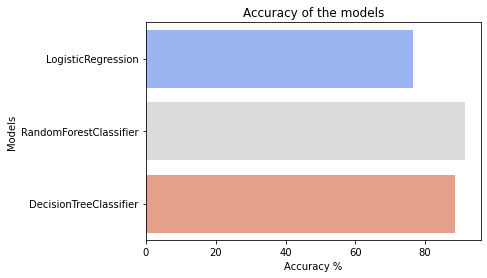

In [43]:
models = [lr,rf_model_final,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

In [44]:
results

Models   Accuracy
0      LogisticRegression  76.544767
0  RandomForestClassifier  91.298865
0  DecisionTreeClassifier  88.524590

* Accuracy allows one to measure the total number of prediction a model gets right. 
* The best performing model will have the highest accuracy. 
* Of the four models tested, random forest classifier has the highest accuracy.

### Hyperparameter Tuning of Random Forest Classifier

In [45]:
rf_params = {"max_depth": [5,8,10],
             "max_features":[5,8,10],
             "n_estimators":[100,500],
             "min_samples_split":[5,10]}

rf_model2 = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model2,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model.fit(X_train_over,y_train_over)
print("Best parameters:"+str(rf_cv_model.best_params_))

![title](images/best_parameters.png)

In [46]:
rf_model_final = RandomForestClassifier(max_depth=10,max_features=10,min_samples_split=5,n_estimators=500,criterion='entropy')
rf_model_final.fit(X_train_over,y_train_over)
y_pred_final = rf_model_final.predict(X_test)

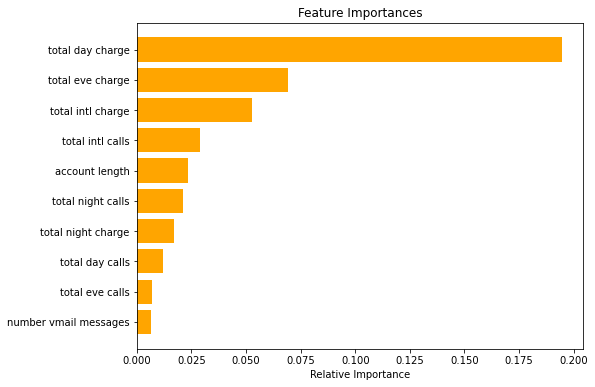

In [47]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
print(classification_report(y_test, y_pred_final, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       664
           1       0.69      0.78      0.73       129

    accuracy                           0.91       793
   macro avg       0.82      0.86      0.84       793
weighted avg       0.91      0.91      0.91       793



**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ****************
Accuracy score for testing set:  0.90794
F1 score for testing set:  0.73455
Recall score for testing set:  0.78295
Precision score for testing set:  0.69178


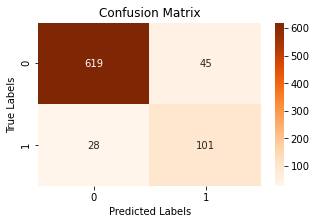

In [49]:
print("**************** HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ****************")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_final),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_final),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_final),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_final),5))
cm_rf = confusion_matrix(y_test, y_pred_final)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* Compared to the original random forest model ran, the one above has a very similar accuracy and F1 score. 
* The model above has a higher recall and lower precision, whereas the original model has a lower recall and higher precision. 
* The model ran above had a lower number of true positives and higher number of false negatives than the original model. 

### Which random forest model is better?

The main difference between the two models is precision and recall values.
* Precision is defined as proportion of the number true positives divided by the number of predicted positives. 
* Recall is defined as the number of true positives divided by the number of actual true positives. 

In this situation, it needs to be determined which scenario will be more costly to the business. The two scenarios currently present are:
* Type 1 - False Positive: The model says client will churn, reality says this is false and they do not. 
* Type 2 - False Negative: The model says client will not churn, reality says this is false and they do. 

Misidentifying churn would be more costly because if a client is about to churn, it would be important to know so that preventative actions can be taken. In regards to precision and recall, the better-performing model would be the one with the higher recall, which is the first model. 

### Modeling Summary
* Three different machine learning models have been used to predict "churn" feature from the dataset and the models were compared using F1 Score, precision, recall, accuracy and AUC (Area Under Curve - ROC Curve) performance metrics to choose the best model.
* In terms of accuracy, the according to F1 score and AUC metrics, the Random Forest Classifier model has performed the best amongst all the models ran.
* Hyperparameter tuning was performed to determine what parameters would yield the best model result. Another random forest regression was ran and it yielded a very similar accuracy and F1 score. The first model had a higher recall, which is optimal for the business problem at hand. 
* Random Forest Classifier algorithm is an ensemble technique which creates many trees and find the predicted class according to those trees that is called "forest" so the technique that is used makes the algorithm more robust than Decision Tree Classifier which only create a single tree to make predictions.

## Suggestions

SyriaTel should start focusing on strategies that will prevent customers from churning as they have already lost 14.8% of their customers. Some ideas are: 
* Offering a discount to customers who have made more than 2 phone calls within 6 months. This small incentive will help accomodate the customer for the issues they have been facing and in turn, lower churn.
* Starting an internal forum where customer service representatives document the common reasons customer call Syriatel. This way the company can start implementing strategic solutions to resolve those issues. 
* Starting a rewards program. The initiative can be called SyriaTel Sundays and every week, the company can offer some sort of discount in partnership with another vendor. This small step will excite customers and want to continue their service with Syriatel. 